In [23]:
# pisa dataset: https://www.kaggle.com/datasets/walassetomaz/pisa-results-2000-2022-economics-and-education?resource=download
# country codes: https://unstats.un.org/unsd/methodology/m49/

# dataset tracks 39 countries from 2003 - 2018
import pandas as pd
import numpy as np
import altair as alt

In [24]:
pisa_df = pd.read_csv('PISA_data.csv')

In [25]:
pisa_df.head()
# pisa_df.shape

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0


In [26]:
country_codes = pd.read_csv('country_codes.csv')
country_codes.head()

,country_name,code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [27]:
# map country codes in pisa df to country names
pisa_df = pisa_df.merge(country_codes, left_on='country', right_on='code')
# pisa_df.drop(columns=['code'], inplace=True)
pisa_df.head()

,index_code,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,...,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,country,time,sex,rating,country_name,code
0,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,...,62.726546,NaN,5.623778,84.343,AUS,2003,BOY,527.0,Australia,AUS
1,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,...,62.726546,NaN,5.623778,84.343,AUS,2003,GIRL,522.0,Australia,AUS
2,AUS-2003,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,...,62.726546,NaN,5.623778,84.343,AUS,2003,TOT,524.0,Australia,AUS
3,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,...,65.231562,NaN,5.719998,84.700,AUS,2006,BOY,527.0,Australia,AUS
4,AUS-2006,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,...,65.231562,NaN,5.719998,84.700,AUS,2006,GIRL,513.0,Australia,AUS


In [28]:
pisa_df['code'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK',
       'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
       'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR',
       'USA', 'GBR', 'BRA'], dtype=object)

In [29]:
pisa_total = pisa_df[pisa_df['sex'] == 'TOT']
pisa_total = pisa_total.drop(columns=['country','index_code'])
pisa_total['name'] = pisa_total['country_name']
pisa_total.shape

(214, 21)

In [30]:
pisa_total['time'] = pisa_total['time'].astype(int)

In [61]:
pisa_total.columns

Index(['expenditure_on _education_pct_gdp', 'mortality_rate_infant',
       'gini_index', 'gdp_per_capita_ppp', 'inflation_consumer_prices',
       'intentional_homicides', 'unemployment',
       'gross_fixed_capital_formation', 'population_density',
       'suicide_mortality_rate', 'tax_revenue',
       'taxes_on_income_profits_capital', 'alcohol_consumption_per_capita',
       'government_health_expenditure_pct_gdp', 'urban_population_pct_total',
       'time', 'sex', 'rating', 'country_name', 'code', 'name'],
      dtype='object')

In [69]:
rawr = pisa_total.groupby(['country_name', 'time'])['rating'].mean().reset_index()
# get the scores of the 2018 rating - 2003 rating
rawr = rawr.pivot(index='country_name', columns='time', values='rating')
rawr['change'] = rawr[2018] - rawr[2003]
rawr = rawr.sort_values(by='change', ascending=False)

In [70]:
rawr

time,2003,2006,2009,2012,2015,2018,change
country_name,,,,,,,
Türkiye,423.0,424.0,445.0,448.0,420.0,454.0,31.0
Brazil,356.0,370.0,386.0,389.0,377.0,384.0,28.0
Portugal,466.0,466.0,487.0,487.0,492.0,492.0,26.0
Poland,490.0,495.0,495.0,518.0,504.0,516.0,26.0
Mexico,385.0,406.0,419.0,413.0,408.0,409.0,24.0
Italy,466.0,462.0,483.0,485.0,490.0,487.0,21.0
Latvia,483.0,486.0,482.0,491.0,482.0,496.0,13.0
Greece,445.0,459.0,466.0,453.0,454.0,451.0,6.0
Norway,495.0,490.0,498.0,489.0,502.0,501.0,6.0


In [107]:
total_avg = pisa_total.groupby(['code'])['rating'].mean().reset_index()
# put every 8 countries into a bin
total_avg['bin'] = total_avg.index // 8
# give the bins each a y coord
total_avg['y'] = total_avg.index % 8

In [108]:
total_avg

,code,rating,bin,y
0,AUS,507.833333,0,0
1,AUT,502.600000,0,1
2,BEL,515.666667,0,2
3,BRA,377.000000,0,3
4,CAN,522.000000,0,4
5,CHE,526.333333,0,5
6,CHL,419.000000,0,6
7,COL,390.500000,0,7
8,CRI,402.000000,1,0
9,CZE,501.500000,1,1


In [112]:
# make a heatmap where each square represents a country using altair and pisa_total, make the squares each represent a different country
# label is the country name, color is the rating
# add labels to the x and y axis
heatmap = alt.Chart(total_avg).mark_rect().encode(
    x='y:O',
    y='bin:O',
    color='rating:Q', 
    tooltip=['code', 'rating'], 
    text='code'

).properties(
    width=500,
    height=500
)

circ = heatmap.mark_text().encode(
    text='code',
    color=alt.condition(alt.datum.rating < 500, alt.value('black'), alt.value('white'))
)
heatmap + circ

alt.LayerChart(...)

In [ ]:
pisa_new_grouped = pisa_total.groupby('country_name')['rating'].mean().sort_values(ascending=False).reset_index()
pisa_new_grouped['name'] = pisa_new_grouped['country_name']

In [ ]:
#pisa_df.groupby(by=['country_name','time', 'sex' ])[['rating', 'gini_index']].mean().sort_values(ascending=True, by='time').reset_index()
pisa_df2 = pisa_df.drop(columns=['country','index_code'])
# pisa_df2.groupby(by=['country_name','time', 'sex' ]).mean().sort_values(ascending=True, by='time').reset_index()
pisa_df2

,expenditure_on _education_pct_gdp,mortality_rate_infant,gini_index,gdp_per_capita_ppp,inflation_consumer_prices,intentional_homicides,unemployment,gross_fixed_capital_formation,population_density,suicide_mortality_rate,tax_revenue,taxes_on_income_profits_capital,alcohol_consumption_per_capita,government_health_expenditure_pct_gdp,urban_population_pct_total,time,sex,rating,country_name
0,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,2003,BOY,527.0,Australia
1,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,2003,GIRL,522.0,Australia
2,5.246357,4.9,33.5,30121.818418,2.732596,1.533073,5.933,26.050295,2.567036,10.5,24.299970,62.726546,NaN,5.623778,84.343,2003,TOT,524.0,Australia
3,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,2006,BOY,527.0,Australia
4,4.738430,4.7,NaN,34846.715630,3.555288,1.372940,4.785,27.789132,2.662089,10.6,24.511772,65.231562,NaN,5.719998,84.700,2006,GIRL,513.0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,2015,GIRL,370.0,Brazil
630,6.241060,14.3,51.9,14692.632307,9.029901,28.356406,8.538,17.835807,24.549506,5.9,13.629629,22.863583,8.19602,3.853849,85.770,2015,TOT,377.0,Brazil
631,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,2018,BOY,388.0,Brazil
632,6.088510,13.5,53.9,14971.054667,3.664850,26.636013,12.330,15.096912,25.145139,7.0,13.940108,24.501440,NaN,3.889238,86.569,2018,GIRL,379.0,Brazil


### map that tracks the average scores over the years

In [ ]:
country_codes_all

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [32]:
url = "https://raw.githubusercontent.com/dallascard/si649_public/main/altair_hw4/small-airports.json"
from vega_datasets import data
countries = alt.topo_feature(data.world_110m.url, "countries")
# https://en.wikipedia.org/wiki/ISO_3166-1_numeric
country_codes_all = pd.read_csv(
    "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
)
# world = alt.topo_feature(url, feature='continent')
base = alt.Chart(countries).mark_geoshape(
    fill = 'lightgray',
    stroke = 'white'
)


year_options=list(pisa_total["time"].unique())
year_options=list(map(lambda x:int(x),year_options))
year_options.sort()

year_radio=alt.binding_radio(
    options=year_options
)
radio_selector = alt.selection_point(
    name="year",
    fields=["time"],
    bind=year_radio,
    value=2003
    )

yearSelector = alt.selection_interval()

sizeCondition=alt.condition(
    yearSelector,
    alt.SizeValue(60),
    alt.SizeValue(10)
)


rating = alt.Chart(countries).mark_geoshape().transform_lookup(
        lookup="id",
        from_=alt.LookupData(data=country_codes_all, key="country-code", fields=["name"]),
    ).transform_lookup(
        lookup="name",
        # can change this to other dfs
        from_=alt.LookupData(data=pisa_total, key="name", fields=["rating"]),
    ).add_params(
        radio_selector,
        yearSelector
    ).encode(
        fill=alt.Color(
            "rating:Q",
            scale=alt.Scale(scheme="reds"),
        ), 
        tooltip=[
            alt.Tooltip("name:N", title="Country"),
            alt.Tooltip("rating:Q", title="Rating"),
            alt.Tooltip("time:O", title="Year")]
            )
# add slider feature for the year of the rating
# add dropdown
# code now


 
chart = (
    (base + rating)
    .properties(width=600, height=600)
    .configure_view(strokeWidth=0)
    .properties(width=700, height=400)
    .project("naturalEarth1")
)     

chart.interactive()

alt.LayerChart(...)

In [33]:
base = alt.Chart(countries).mark_geoshape(
    fill = 'lightgray',
    stroke = 'white'
).project("mercator").interactive()


# Define a list of country codes for each region (ISO-3166 Alpha-3 codes)
na_countries = ['USA', 'CAN', 'MEX']  # Example North America countries
sa_countries = ['BRA', 'ARG', 'COL']  # Example South America countries
eu_countries = ['FRA', 'DEU', 'ITA'] # Example Europe countries
aus_asia_countries = ['AUS', 'CHN', 'JPN', 'IND']  # Example Australia and Asia countries

def create_map(region_countries, title):
    return alt.Chart(countries).mark_geoshape(
        fill = 'lightgray',
        stroke='white'
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(data=country_codes_all, key="country-code", fields=["country-code"])).transform_filter(
        alt.FieldOneOfPredicate(field='country-code', oneOf=region_countries)
    ).properties(
        width=300,
        height=300,
        title=title
    ).project('mercator')


# Create maps for each region
na_chart = create_map(na_countries, 'North America')
sa_chart = create_map(sa_countries, 'South America')
eu_chart = create_map(eu_countries, 'Europe')
aus_asia_chart = create_map(aus_asia_countries, 'Australia & Asia')

# Combine charts
final_chart = alt.hconcat(
    alt.vconcat(na_chart, sa_chart),
    alt.vconcat(eu_chart, aus_asia_chart)
)
na_chart

alt.Chart(...)

In [34]:
from vega_datasets import data
countries = alt.topo_feature(data.world_110m.url, "countries")
# https://en.wikipedia.org/wiki/ISO_3166-1_numeric
country_codes = pd.read_csv(
    "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
)

background = alt.Chart(countries).mark_geoshape(fill="lightgray")

# we transform twice, first from "ISO 3166-1 numeric" to name, then from name to value
foreground = (
    alt.Chart(countries)
    .mark_geoshape()
    .transform_lookup(
        lookup="id",
        from_=alt.LookupData(data=country_codes, key="country-code", fields=["name"]),
    )
    .transform_lookup(
        lookup="name",
        from_=alt.LookupData(data=pisa_df2, key="name", fields=["rating"]),
    )
    .encode(
        fill=alt.Color(
            "rating:Q",
            scale=alt.Scale(scheme="reds"),
        )
    )
)

chart = (
    (background + foreground)
    .properties(width=600, height=600)
    .project(
        type="equalEarth",
        scale=800,
        translate=[200, 1000],
    )
)

chart

NameError: name 'pisa_df2' is not defined

In [35]:
import geopandas as gpd
custom_world = gpd.read_file('europe.geo.json')
# custom_world = alt.topo_feature('https://github.com/bkarduck/custom-jsons/blob/main/europe.geo.json', 'geometry')

europe = alt.Chart(custom_world).mark_geoshape(color='lightgrey').encode(   
tooltip=[alt.Tooltip('name:N', title='Country')]
).properties(
    width=600,
    height=400
).project(
    scale=400, translate=[100, 550]
)
europe

alt.Chart(...)

In [36]:
url_geojson = 'https://raw.githubusercontent.com/mattijn/datasets/master/two_polygons.geo.json'

# url_geojson = 'https://github.com/bkarduck/custom-jsons/blob/main/europe.geo.json'
data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))
custom_world = gpd.read_file('europe.geo.json')

#chart object for remote data
ch_remote = alt.Chart(custom_world).mark_geoshape(
).encode(
    color="properties.name:N"
).project(
    type='identity', reflectY=True
)
# st.altair_chart(ch_remote, use_container_width=True)
ch_remote


alt.Chart(...)

In [37]:
custom_world.to_wkt()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,2,France,FR1,1,2,Country,1,France,...,None,None,None,None,None,None,None,None,FRA.geojson,"MULTIPOLYGON (((-51.657797 4.156232, -52.24933..."
1,Admin-0 country,1,3,Ukraine,UKR,0,2,Sovereign country,1,Ukraine,...,None,None,None,None,None,None,None,None,UKR.geojson,"POLYGON ((31.785992 52.101678, 32.15944 52.061..."
2,Admin-0 country,1,4,Belarus,BLR,0,2,Sovereign country,1,Belarus,...,None,None,None,None,None,None,None,None,BLR.geojson,"POLYGON ((28.176709 56.16913, 29.229513 55.918..."
3,Admin-0 country,1,5,Lithuania,LTU,0,2,Sovereign country,1,Lithuania,...,None,None,None,None,None,None,None,None,LTU.geojson,"POLYGON ((26.494331 55.615107, 26.588279 55.16..."
4,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,None,None,None,None,RUS.geojson,"MULTIPOLYGON (((178.7253 71.0988, 180 71.51571..."
5,Admin-0 country,1,5,Czechia,CZE,0,2,Sovereign country,1,Czechia,...,None,None,None,None,None,None,None,None,CZE.geojson,"POLYGON ((15.016996 51.106674, 15.490972 50.78..."
6,Admin-0 country,1,2,Germany,DEU,0,2,Sovereign country,1,Germany,...,None,None,None,None,None,None,None,None,DEU.geojson,"POLYGON ((14.119686 53.757029, 14.353315 53.24..."
7,Admin-0 country,1,6,Estonia,EST,0,2,Sovereign country,1,Estonia,...,None,None,None,None,None,None,None,None,EST.geojson,"POLYGON ((27.981127 59.475373, 27.98112 59.475..."
8,Admin-0 country,1,5,Latvia,LVA,0,2,Sovereign country,1,Latvia,...,None,None,None,None,None,None,None,None,LVA.geojson,"POLYGON ((27.288185 57.474528, 27.770016 57.24..."
9,Admin-0 country,1,3,Norway,NOR,0,2,Sovereign country,None,Norway,...,None,None,None,None,None,None,None,None,NOR.geojson,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."


In [38]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/3822660980.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid


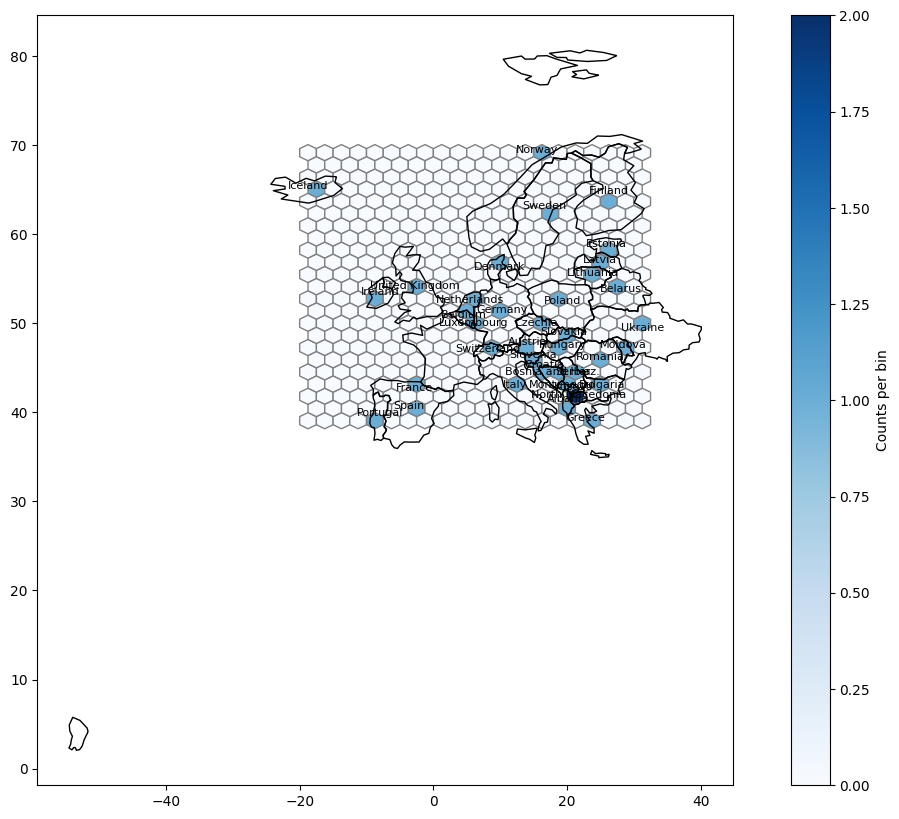

In [83]:
# Calculate the centroids of the countries
import matplotlib.pyplot as plt
import geopandas as gpd
world = gpd.read_file('europe.geo.json')
# drop russia
world = world[world['name'] != 'Russia']
world['centroid'] = world.geometry.centroid

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.boundary.plot(ax=ax, linewidth=1, color='black')
hexbin_map = ax.hexbin(world['centroid'].x, world['centroid'].y, gridsize=20, cmap='Blues', edgecolors='gray')

# Add color bar
cb = fig.colorbar(hexbin_map, ax=ax, orientation='vertical')
cb.set_label('Counts per bin')

# Add labels
for idx, row in world.iterrows():
    ax.text(row['centroid'].x, row['centroid'].y, s=row['name'], horizontalalignment='center', fontsize=8)

plt.show()

In [82]:
world.groupby('continent').count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Antarctica,1,1,1,1,1
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
Seven seas (open ocean),1,1,1,1,1
South America,13,13,13,13,13


/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/3555680092.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['hexagon'] = world.centroid.apply(hexagon, size=hex_size)


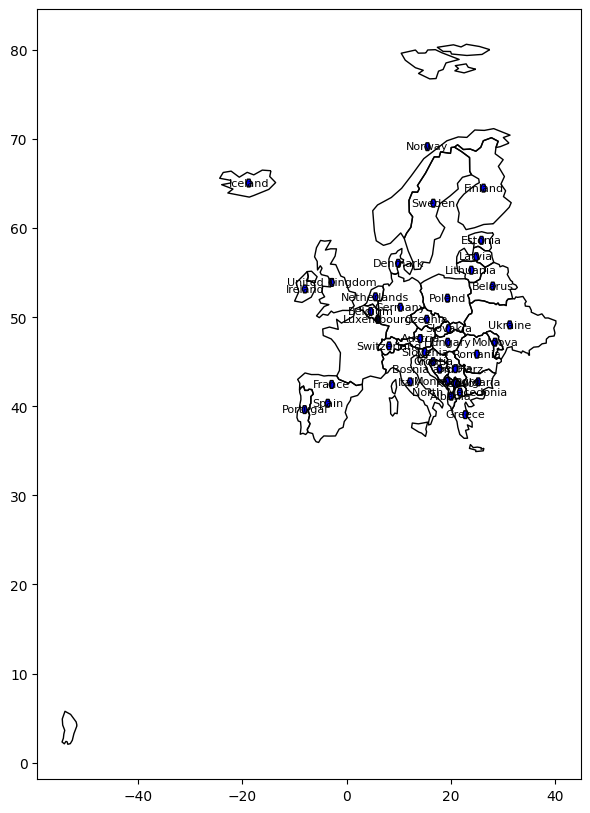

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# Load world data
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Function to create a hexagon at the given point
def hexagon(point, size):
    x, y = point.x, point.y
    angle = np.linspace(0, 2*np.pi, 7)
    x_hexagon = x + size * np.cos(angle)
    y_hexagon = y + size * np.sin(angle)
    return Polygon(np.vstack([x_hexagon, y_hexagon]).T)

# Size of the hexagon, this controls the size of each hexagon
hex_size = 0.5

# Create a hexagon for each country's centroid
world['hexagon'] = world.centroid.apply(hexagon, size=hex_size)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='black')
world.set_geometry('hexagon').plot(ax=ax, color='blue', edgecolor='black')

# Adding labels to the hexagons
for idx, row in world.iterrows():
    plt.text(row['hexagon'].centroid.x, row['hexagon'].centroid.y, row['name'], ha='center', va='center', fontsize=8)

plt.show()


<Axes: >

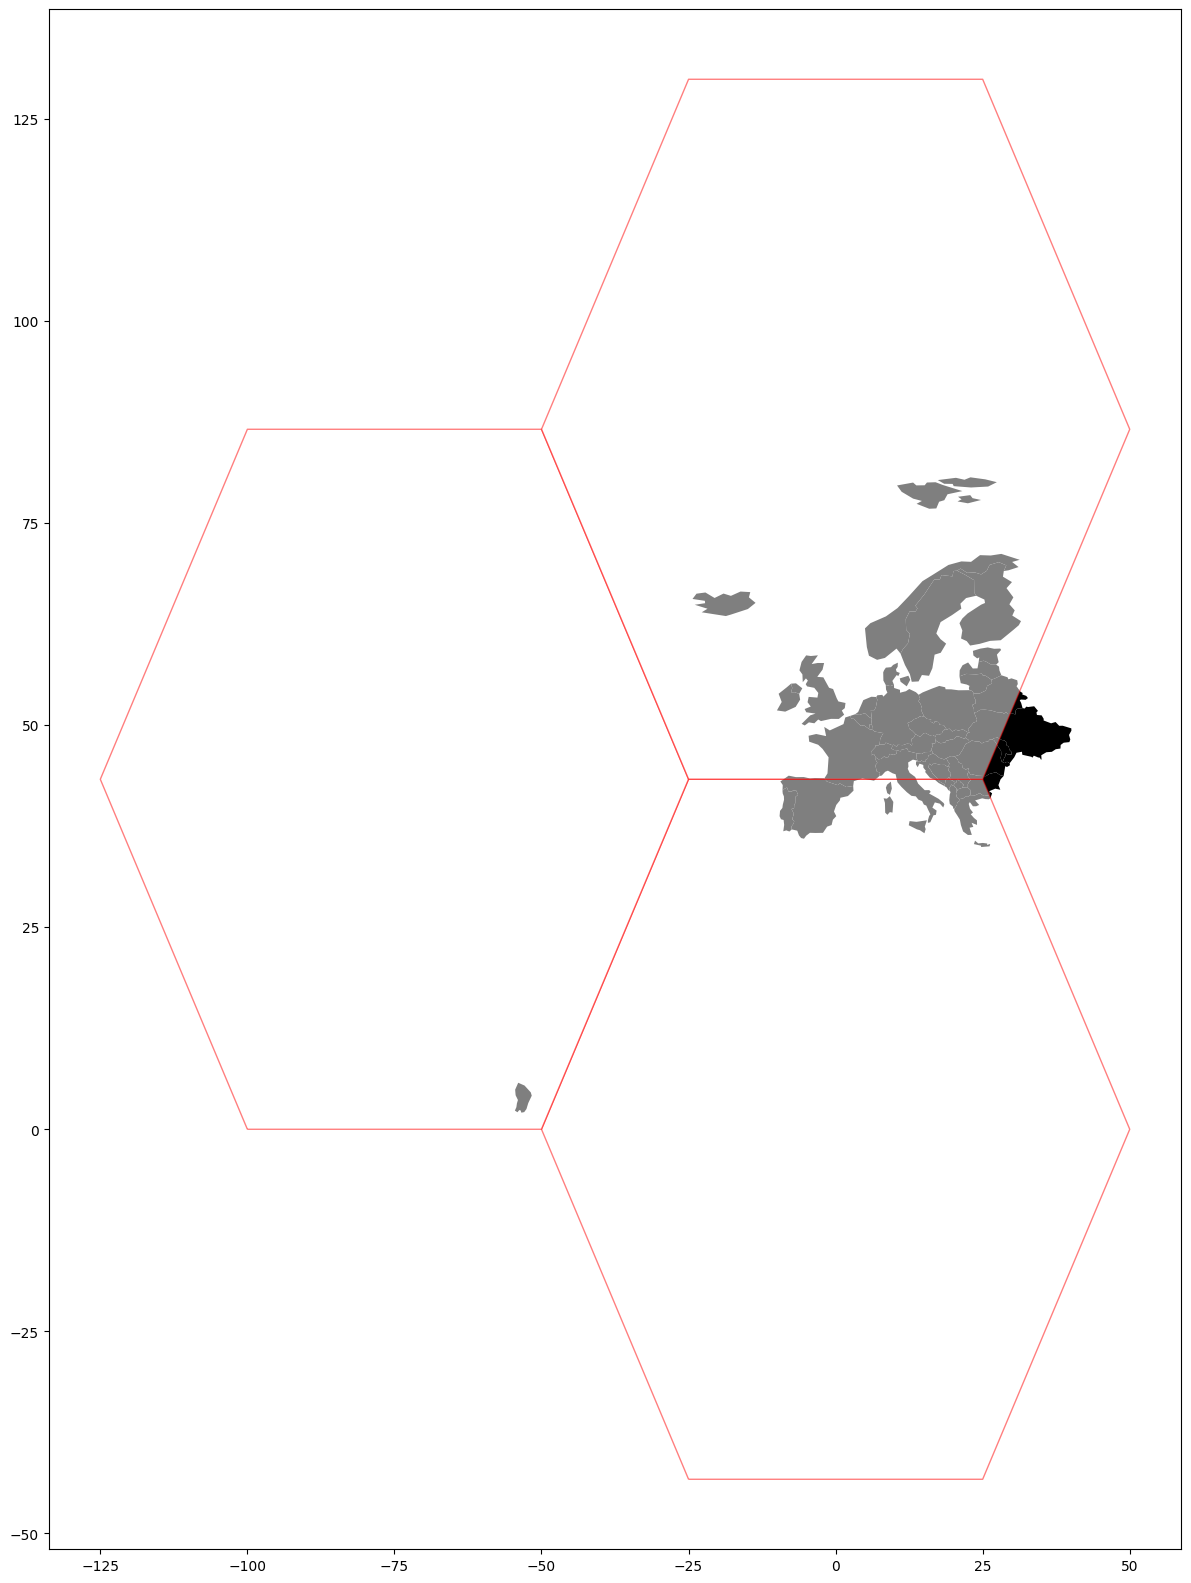

In [41]:
import geopandas as gpd
import geohexgrid as ghg

# Load New Zealand territorial authorities projected in EPSG 2193 (NZTM)
# nz = gpd.read_file(DATA_DIR / "nz_tas.gpkg")

# Cover it minimally with hexagons of circumradius 10 kilometres
grid = ghg.make_grid_from_gdf(world, R=50)

# Plot
base = world.plot(color="black", figsize=(20, 20), aspect="equal")
grid.plot(ax=base, color="white", edgecolor="red", alpha=0.5)

In [42]:
import altair as alt
import geopandas as gpd
import pandas as pd

# Load world data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for European countries
europe = world[world['continent'] == 'Europe']

# Sample data attribute (e.g., GDP)
# Normally you would load this from your data source
europe['GDP'] = pd.Series([1000, 1200, 3000, 700, 2300, 1100, 500, 800, 4400, 3100, 2700, 3200, 2100, 1900, 3300, 3400, 3600, 900, 1300, 2200, 2800, 3500, 2600, 1500, 1600, 1700, 2000, 1400, 1800, 2500, 2400, 2900, 3700, 3800, 3900, 4000, 4100, 4200, 4300], 
                     index=europe.index)

# Convert to GeoJSON for Altair
europe = europe.to_json()

# Create a GeoJSON data object in Altair
data = alt.Data(values=europe, format=alt.DataFormat(property='features',type='json'))

# Geographic plot
chart = alt.Chart(data).mark_geoshape(
    stroke='black'
).encode(
    color='properties.GDP:Q', # Use the GDP value for coloring
    tooltip=[alt.Tooltip('properties.name:N', title='Country'), alt.Tooltip('properties.GDP:Q', title='GDP')]
).properties(
    width=600,
    height=400,
    title='European Countries Heatmap by GDP'
).project(
    type='mercator'
)

chart.display()


/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/3087979850.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


alt.Chart(...)

In [43]:
import altair as alt
import geopandas as gpd
import pandas as pd
import random as random

# Load world data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for European countries
europe = world[world['continent'] == 'Europe']
europe = europe[europe['name'] != 'Russia']

# Calculate centroids
europe['centroid'] = europe.centroid
europe['lon'] = europe['centroid'].apply(lambda x: x.x)
europe['lat'] = europe['centroid'].apply(lambda x: x.y)

# Sample data attribute (e.g., GDP per country)
# This is mock data; replace with your actual data
europe['GDP'] = pd.Series([random.randint(500, 4500) for _ in range(len(europe))], index=europe.index)

# Convert to pandas DataFrame for use in Altair
europe_df = pd.DataFrame({
    'Country': europe['name'],
    'Longitude': europe['lon'],
    'Latitude': europe['lat'],
    'GDP': europe['GDP']
})

# Create the heatmap
heatmap = alt.Chart(europe_df).mark_rect().encode(
    x='Longitude:Q',
    y='Latitude:Q',
    color='GDP:Q',
    tooltip=['Country:N', 'GDP:Q']
).properties(
    title='European Countries Heatmap by GDP',
    width=600,
    height=400
)

# Add text labels
text = heatmap.mark_text(
    align='center',
    baseline='middle',
    fontSize=8,
    dy=-10  # Adjust this value to position the text correctly within the square
).encode(
    text='Country:N',
    x='Longitude:Q',
    y='Latitude:Q'
)

# Combine layers
final_chart = (heatmap + text).configure_view(
    strokeWidth=0  # Remove grid lines
).project('identity', reflectY=True)

final_chart.display()


/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/1800680906.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/1800680906.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe['centroid'] = europe.centroid


alt.LayerChart(...)

In [59]:


url_geojson = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson"
data_url_geojson = alt.Data(url=url_geojson, format=alt.DataFormat(property="features"))
eu_chart = alt.Chart(data_url_geojson, view=alt.ViewConfig(strokeWidth=10, stroke='blue')).mark_geoshape().transform_filter(
        alt.FieldOneOfPredicate(field='properties.region_un', oneOf=['Europe', ])
    ).transform_lookup(
        lookup="properties.iso_a3",
        # can change this to other dfs
        from_=alt.LookupData(data=pisa_total, key="code", fields=["rating"]),
    ).encode(
        fill=alt.Color(
            "rating:Q",
            scale=alt.Scale(scheme="reds"),
        ), 
        tooltip=[
            alt.Tooltip("properties.name:N", title="Country"),
            alt.Tooltip("rating:Q", title="Rating"),]
            ).properties(width=400, height=270).configure_view(strokeWidth=1, stroke='black', strokeOpacity=1).project('naturalEarth1')
# eu_chart.configure(style=dict(cell=dict(strokeOpacity=100)))
# eu_chart.configure(style=alt.StyleConfigIndex(cell=alt.MarkConfig(strokeOpacity=1)))

#.project(type='mercator', reflectY=False, scale=140, translate=[100, 300])
eu_chart

alt.Chart(...)

/var/folders/k9/6c26p32970l0vhs0_8nyb60h0000gn/T/ipykernel_9359/3827499567.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis').copy()  # if not using a custom cmap


Text(0.5, 1.2, 'Countries by total waterways length (km)\n(source: https://en.wikipedia.org/wiki/List_of_countries_by_waterways_length)')

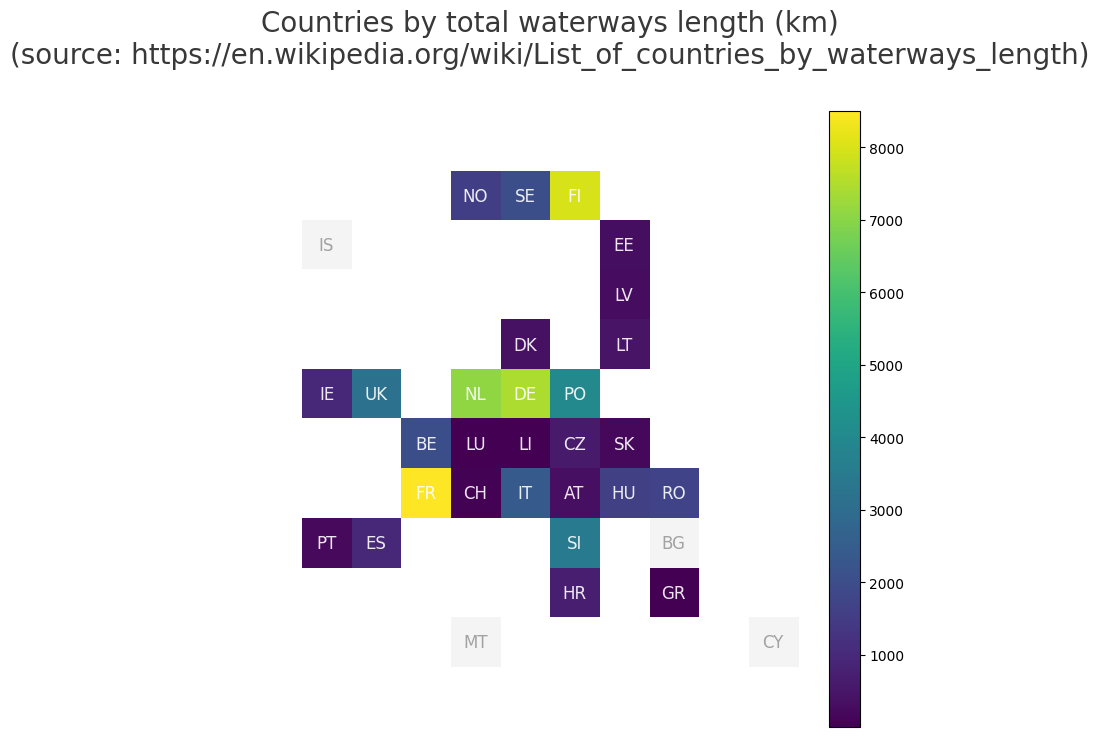

In [80]:
countries = {
    'Norway': (0,3, 'NO'),
    'Sweden': (0,4, 'SE'),
    'Finland': (0,5, 'FI'),
    'Estonia': (1,6, 'EE'),
    'Iceland': (1,0, 'IS'),
    'Latvia': (2,6, 'LV'),
    'Denmark': (3,4, 'DK'),
    'Lithuania': (3,6, 'LT'),
    'Ireland': (4,0, 'IE'),
    'UK': (4,1, 'UK'),
    'Netherlands': (4,3, 'NL'),
    'Germany': (4,4, 'DE'),
    'Poland': (4,5, 'PO'),
    'Belgium': (5,2, 'BE'),
    'Luxembourg': (5,3, 'LU'),
    'Liechtenstein': (5,4, 'LI'),
    'Czech Republic': (5,5, 'CZ'),
    'Slovakia': (5,6, 'SK'),
    'France': (6,2, 'FR'),
    'Switzerland': (6,3, 'CH'),
    'Italy': (6,4, 'IT'),
    'Austria': (6,5, 'AT'),
    'Hungary': (6,6, 'HU'),
    'Romania': (6,7, 'RO'),
    'Portugal': (7,0, 'PT'),
    'Spain': (7,1, 'ES'),
    'Slovenia': (7,5, 'SI'),
    'Bulgaria': (7,7, 'BG'),
    'Croatia': (8,5, 'HR'),
    'Greece': (8,7, 'GR'),
    'Malta': (9,3, 'MT'),
    'Cyprus': (9,9, 'CY'),
}
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import requests
import io
from matplotlib.colors import LinearSegmentedColormap
cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),
 
         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }
# colors, points = ['#034694', '#034694'], [0.0, 1.0]
# custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(points, colors)))
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import requests
import io

# Download data and read into a dataframe
f = requests.get('https://gist.githubusercontent.com/catslovedata/316cddf9a4069ff4d2abdef1502ce99e/raw/90527f4d52a79ae2882500ea3ef707441022a21d/20230114B.csv')
df = pd.read_csv(io.BytesIO(f.content), sep=',', index_col='country')
# Store off min and max
d_min, d_max = min(df['waterways_length']), max(df['waterways_length'])

# Populate grid to hold the heatmap
data = np.full([10,10,], (np.nan))
for k, v in countries.items():
    data[(v[0],v[1])] = df._get_value(k, 'waterways_length') if k in df.index else d_min - 1  # -1 to make it lower than the data minimum so we can use set_under()

# Create the visuals
# cmap = custom_cmap.copy()
cmap = mpl.cm.get_cmap('viridis').copy()  # if not using a custom cmap
cmap.set_under('#cccccc', alpha=0.2)        # Values outside the stated range of the cmap will be shown as this

plt.figure(figsize=(8,8))
im = plt.imshow(data, cmap=cmap, interpolation=None, vmin=d_min, vmax=d_max)
plt.colorbar(im)

# Now add the text
for k, v in countries.items():
    plt.text(v[1],v[0],v[2],horizontalalignment='center', verticalalignment='center', color='white' if k in df.index else '#999', fontsize=12, fontweight='400', alpha=0.9)

plt.axis(False)
plt.title('Countries by total waterways length (km)\n(source: https://en.wikipedia.org/wiki/List_of_countries_by_waterways_length)', y=1.2, fontsize=20,  fontweight='300', color='#222222', alpha=0.9)
